### Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
dataframe = pd.read_csv(r"data.csv",sep=';')
dataframe.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


### Resumen estadístico de los datos

In [4]:

dataframe.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Visualización de los datos

C:\Users\kitty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


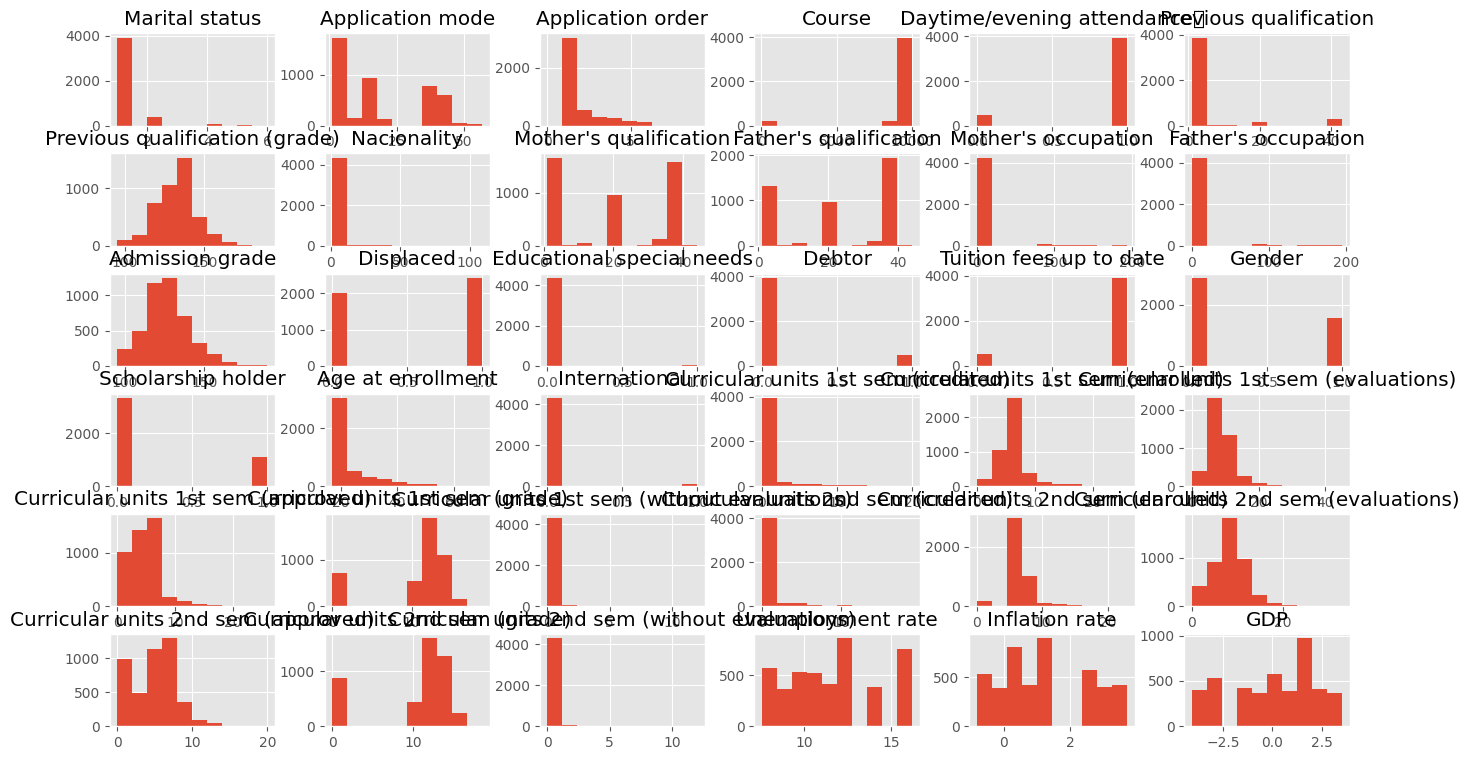

In [5]:

dataframe.hist()
plt.show()

### Preparar las entradas

In [6]:
X = dataframe.drop(columns=['Target'])
y = dataframe['Target']

### Codificar variables categóricas

In [7]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

### Separar datos para el entrenamiento y para la prueba del modelo

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### Escalar datos

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Aplicar algoritmo

C:\Users\kitty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kitty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

([<matplotlib.axis.XTick at 0x224eadbd390>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

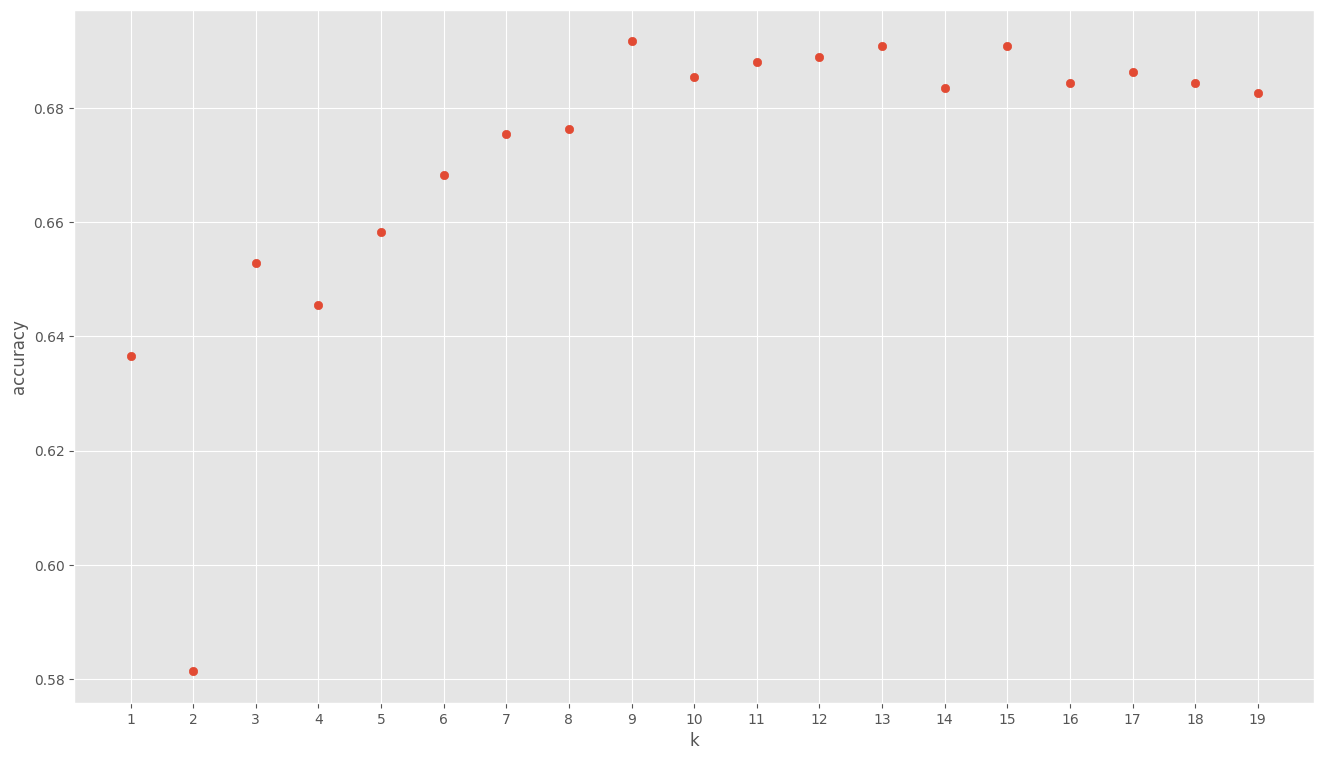

In [15]:

from sklearn.neighbors import KNeighborsClassifier
# Elegir mejor valor de K
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(1, 20))

In [16]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 10
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.69


### Ver la precisión del modelo

Confirmemos la precisión viendo la Confusión Matrix y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos

In [17]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[235  28  90]
 [ 39  41 113]
 [ 34  44 482]]
              precision    recall  f1-score   support

     Dropout       0.76      0.67      0.71       353
    Enrolled       0.36      0.21      0.27       193
    Graduate       0.70      0.86      0.77       560

    accuracy                           0.69      1106
   macro avg       0.61      0.58      0.58      1106
weighted avg       0.66      0.69      0.67      1106



### GRÁFICO

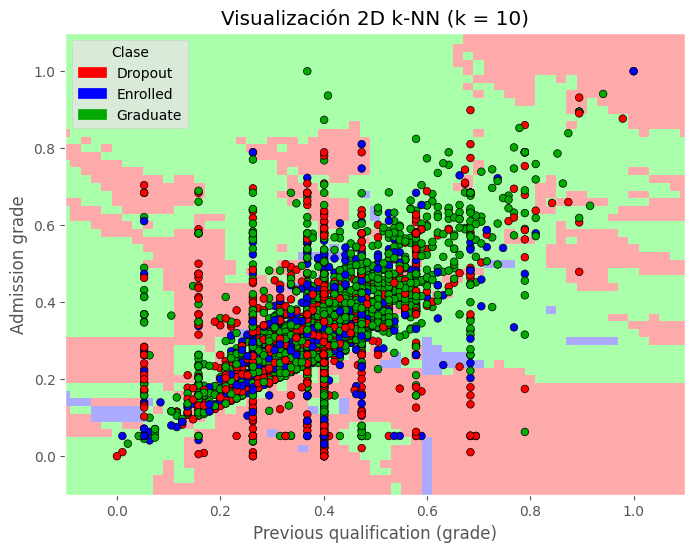

In [18]:
X = dataframe[['Previous qualification (grade)', 'Admission grade']].copy()

# Codificamos la variable objetivo (Graduate, Dropout, Enrolled)
le = LabelEncoder()
y = le.fit_transform(dataframe['Target'])  # Ahora y será 0, 1 o 2


# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Escalar las variables numéricas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo k-NN

weights = 'uniform'
clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
clf.fit(X_train_scaled, y_train)

# Visualización en 2D
h = .02
x_min, x_max = X_train_scaled[:, 0].min() - 0.1, X_train_scaled[:, 0].max() + 0.1
y_min, y_max = X_train_scaled[:, 1].min() - 0.1, X_train_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00AA00'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=30)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Visualización 2D k-NN (k = {n_neighbors})")
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')

labels = le.classes_
legend_handles = [mpatches.Patch(color=cmap_bold(i), label=label) for i, label in enumerate(labels)]
plt.legend(handles=legend_handles, title="Clase")


plt.show()

# PREDICCIONES

Predicción: 2
Clase predicha: ['Graduate']
Probabilidades de clase: [[0.3 0.2 0.5]]


C:\Users\kitty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


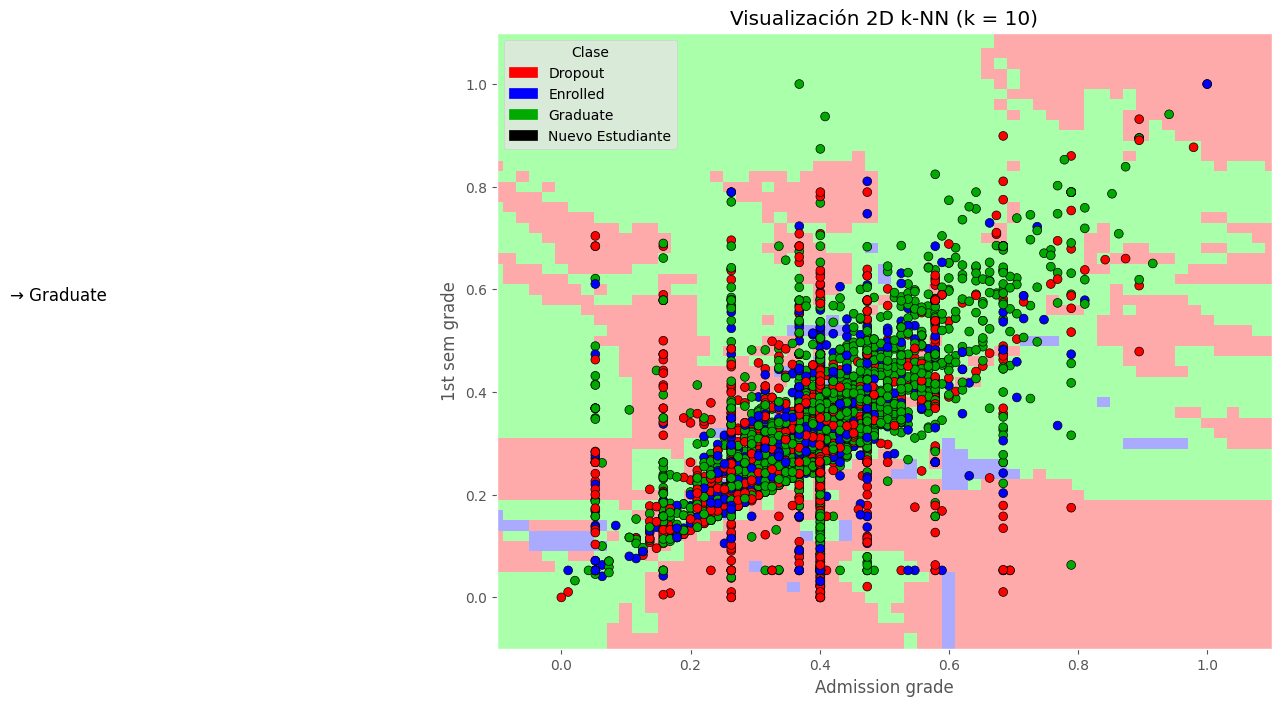

In [21]:

nuevo_estudiante = np.array([[12, 150]])

nuevo_estudiante_scaled = scaler.transform(nuevo_estudiante)

prediccion = clf.predict(nuevo_estudiante_scaled)
print("Predicción:", prediccion[0])
print("Clase predicha:", le.inverse_transform([prediccion[0]]))
# Predicción de probabilidad
prediccion_prob = clf.predict_proba(nuevo_estudiante_scaled)
print("Probabilidades de clase:", prediccion_prob)
# Graficar la predicción del nuevo estudiante
import matplotlib.patches as mpatches

# Gráfico
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Datos de entrenamiento
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=40)

# Nuevo estudiante resaltado
plt.scatter(
    nuevo_estudiante_scaled[0, 0], nuevo_estudiante_scaled[0, 1],
    c='black', s=2000, marker='*', edgecolor='white', linewidth=2, label='Nuevo Estudiante'
)

# Anotación con la clase predicha
plt.text(
    nuevo_estudiante_scaled[0, 0] + 0.02, nuevo_estudiante_scaled[0, 1],
    f"→ {le.inverse_transform([prediccion[0]])[0]}",
    fontsize=12, color='black'
)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Visualización 2D k-NN (k = {n_neighbors})")
plt.xlabel('Admission grade')
plt.ylabel('1st sem grade')

# Leyenda
plt.legend(
    handles=legend_handles + [mpatches.Patch(color='black', label='Nuevo Estudiante')],
    title="Clase"
)
plt.grid(True)
plt.show()


In [22]:
print("Nuevo estudiante escalado:", nuevo_estudiante_scaled)


Nuevo estudiante escalado: [[-0.87368421  0.57894737]]
